<a href="https://colab.research.google.com/github/Amanr1996/Credit_card_Default_pred_Capstone_3/blob/main/ML_Classificatin_Credit_card_Default_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit card Deafault Prediction.



##### **Project Type**    - Classification
##### **Contribution**    - Individual


# **Project Summary -**

This project is aimed at predicting the case of customers' default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of

This project aims to predict credit card default using a classification model. The dataset used is from a bank in Taiwan, which contains various demographic and financial attributes of their clients.

A variety of classification algorithms, such as logistic regression, decision tree, and random forest, are implemented to build predictive models. The models are evaluated using performance metrics such as accuracy, precision, recall, and F1 score.



Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


The problem statement is that banks face significant risks associated with credit card defaults, which can result in substantial financial losses. Predicting credit card defaulters is therefore essential for banks to manage their credit risk, allocate resources effectively, and offer competitive rates to their customers.

The current challenge is that traditional credit risk assessment methods may not be sufficient to accurately predict credit card defaults. To address this problem, there is a need to develop advanced predictive analytics models that can leverage large amounts of data to identify patterns and trends that traditional methods may overlook.

The objective of this project is to develop a predictive model that can accurately forecast credit card defaults, allowing banks to make informed decisions on how much credit to extend to individuals and adjust interest rates based on the predicted risk. This model will also enable banks to proactively identify high-risk accounts and take preventative measures to reduce the risk of defaults.

By addressing this problem, the proposed solution can help banks optimize their credit risk management processes, reduce bad debt expenses, and promote financial stability for their customers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [107]:
## Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [108]:
#Mounting Google Drive
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [109]:
##Loading CSV file from google drive.
path = "/content/gdrive/MyDrive/Capstone_Project _3/default of credit card clients.csv"
df = pd.read_csv(path, header = 1)

### Dataset First View

In [110]:
# Dataset First Look
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [111]:
# Dataset Rows & Columns count
df.shape

(30000, 25)

### Dataset Information

In [112]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

#### Duplicate Values

In [113]:
# Dataset Duplicate Value Count
duplicate_count = df.duplicated().sum()
duplicate_count

0

#### Missing Values/Null Values

In [114]:
# Missing Values/Null Values Count
missing_count = df.isnull().sum()
missing_count

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

In [115]:
# Visualizing the missing values


In [116]:
## lets find out the unique values in every columns

for col in df.columns:
  print(col,df[col].value_counts())

ID 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
LIMIT_BAL 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
SEX 2    18112
1    11888
Name: SEX, dtype: int64
EDUCATION 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
MARRIAGE 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
AGE 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54   

### What did you know about your dataset?

1. Data set having 25 column and 30000 rows.
2. There are no missing and no duplicate values.
3. All columns having Data Type integer.



## ***2. Understanding Your Variables***

In [117]:
# Dataset Columns
## lets find out the unique values in every columns

for col in df.columns:
  print("Column_Name ",col,df[col].value_counts())

Column_Name  ID 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
Column_Name  LIMIT_BAL 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
Column_Name  SEX 2    18112
1    11888
Name: SEX, dtype: int64
Column_Name  EDUCATION 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Column_Name  MARRIAGE 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Column_Name  AGE 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47  

In [118]:
# Dataset Describe

### Variables Description 

#There are 25 variables:

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

* SEX: Gender (1=male, 2=female)

* EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* MARRIAGE: Marital status (1=married, 2=single, 3=others)
* AGE: Age in years
* PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
* PAY_2: Repayment status in August, 2005 (scale same as above)
* PAY_3: Repayment status in July, 2005 (scale same as above)
* PAY_4: Repayment status in June, 2005 (scale same as above)
* PAY_5: Repayment status in May, 2005 (scale same as above)
* PAY_6: Repayment status in April, 2005 (scale same as above)
* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
* Default payment (1=yes, 0=no)

### Check Unique Values for each variable.

In [119]:
# Check Unique Values for each variable.
for col in df.columns:
  print("Column_Name ",col,df[col].value_counts())

Column_Name  ID 1        1
19997    1
20009    1
20008    1
20007    1
        ..
9996     1
9995     1
9994     1
9993     1
30000    1
Name: ID, Length: 30000, dtype: int64
Column_Name  LIMIT_BAL 50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64
Column_Name  SEX 2    18112
1    11888
Name: SEX, dtype: int64
Column_Name  EDUCATION 2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64
Column_Name  MARRIAGE 2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64
Column_Name  AGE 29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47  

## 3. ***Data Wrangling***

### Data Wrangling Code

first we will rename the data set so that it will be easy to understand.

In [120]:
# Write your code to make your dataset analysis ready.
# making dataframe more readable by creating new column names
rename_list = ['ID','max_credit_given', 'gender', 'education', 'marital_status', 'age','pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april','payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
print(rename_list)
print(len(rename_list))

print(df.columns)
print(len(df.columns))
## zipping the existing columns name and new columns name together, and converting into the dictionary
col_name = dict(zip(df.columns, rename_list))

['ID', 'max_credit_given', 'gender', 'education', 'marital_status', 'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april', 'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
25
Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
25


In [121]:
## rename columns 
df = df.rename(columns = col_name)

In [122]:
## lets check the converted data set
df.head()

,ID,max_credit_given,gender,education,marital_status,age,pay_status_sept,pay_status_aug,pay_status_july,pay_status_june,...,bill_june,bill_may,bill_april,payment_sept,payment_aug,payment_jul,payment_jun,payment_may,payment_april,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [123]:
## lets see the catagorical values.
df[['gender','education','marital_status', 'age']].describe()

,gender,education,marital_status,age
count,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.603733,1.853133,1.551867,35.485500
std,0.489129,0.790349,0.521970,9.217904
min,1.000000,0.000000,0.000000,21.000000
25%,1.000000,1.000000,1.000000,28.000000
50%,2.000000,2.000000,2.000000,34.000000
75%,2.000000,2.000000,2.000000,41.000000
max,2.000000,6.000000,3.000000,79.000000


In [124]:
## value count of gender columns.
df['gender'].value_counts()

2    18112
1    11888
Name: gender, dtype: int64

^Gender column is good codition

In [125]:
# Count the number of male and female customers
male_count = df['gender'][df['gender'] == 1].count()
female_count = df['gender'][df['gender'] == 0].count()

# Calculate the percentages
total_count = df.shape[0]
male_percent = 100 * (male_count / total_count)
female_percent = 100 - male_percent

# Print the results
print("Male percentage: {:.2f}%".format(male_percent))
print("Female percentage: {:.2f}%".format(female_percent))

Male percentage: 39.63%
Female percentage: 60.37%


Percentage of male and female defaulters

In [126]:
# Calculate the number of male defaulters
male_defaulter = df['default'][df['gender'] == 1].sum()

# Calculate the number of female defaulters
female_defaulter = df['default'][df['gender'] == 2].sum()

## Total Number of defaulters
total_defaulters  = male_defaulter + female_defaulter
# Print the results
print(f"Percentage of of male defaulters: {(male_defaulter/total_defaulters)*100} %")
print(f"Percentage of of female defaulters: {(female_defaulter/total_defaulters)*100} %")

Percentage of of male defaulters: 43.29415310427969 %
Percentage of of female defaulters: 56.70584689572031 %


In [127]:
## value count of gender columns.
df['education'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: education, dtype: int64

in this column we know that the 4 representing others and 0, 5 and 6 representing unknown

we will  replace 0, 5 and 6 with 4 so we can have only 4 categories 

In [128]:
df.columns

Index(['ID', 'max_credit_given', 'gender', 'education', 'marital_status',
       'age', 'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default'],
      dtype='object')

In [129]:
## lets replace the value by using replace method
df['education'] =  df['education'].replace([0,6,5],4)

In [130]:
df['education'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: education, dtype: int64

In [131]:
df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

In [132]:
df['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

sale issue with education column here aslo we have extra category 

we will combine both 3 and 3 together

In [133]:
## we will relace zero with 3
df["marital_status"] = df["marital_status"].replace(0,3)

In [134]:
df[ 'age'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: age, dtype: int64

#we have to answer following questions.
1. Which Age group uses Credit card the most??
2. Which age group having maximum default payment?
3. Which age group of female having maximum default payments?
4. Which age group of male having maximum default payment

which age group having maximum default payment?

In [135]:
new_df = df[['age','gender','marital_status','default']]
new_df

,age,gender,marital_status,default
0,24,2,1,1
1,26,2,2,1
2,34,2,2,0
3,37,2,1,0
4,57,1,1,0
...,...,...,...,...
29995,39,1,1,0
29996,43,1,2,0
29997,37,1,2,1
29998,41,1,1,1


In [144]:
# define age ranges
# calculate age ranges
age_min = new_df['age'].min()
age_max = new_df['age'].max()
age_step = 5
age_ranges = [(i, i+age_step) for i in range(age_min, age_max, age_step)]

# create a new column for age range
new_df['age_range'] = pd.cut(new_df['age'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]])

# group the data by age range
grouped = new_df.groupby('age_range')


<ipython-input-144-2301d421798d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['age_range'] = pd.cut(new_df['age'], bins=[x[0] for x in age_ranges] + [age_ranges[-1][1]])


* Which age group of male having maximum default payment

In [137]:
## creating data frame for Male Defaulters' 
male_df = new_df[['age_range','gender','default']][new_df['gender'] == 1]
male_df

,age_range,gender,default
4,"(56, 61]",1,0
5,"(36, 41]",1,0
6,"(26, 31]",1,0
9,"(31, 36]",1,0
13,"(26, 31]",1,1
...,...,...,...
29995,"(36, 41]",1,0
29996,"(41, 46]",1,0
29997,"(36, 41]",1,1
29998,"(36, 41]",1,1


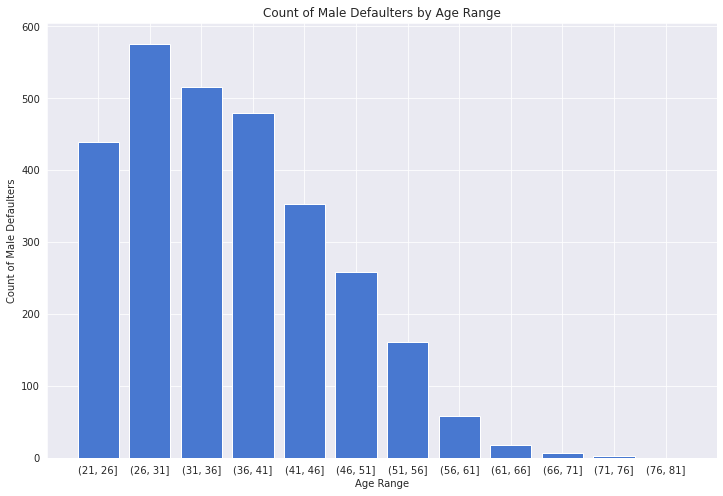

In [138]:
# group the data by age range
grouped = male_df.groupby('age_range')


# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of Male Defaulters')
plt.title('Count of Male Defaulters by Age Range')
plt.show()

which Age group uses Credit card the most??

In [140]:
new_df['age_range'].value_counts()

(26, 31]    7103
(31, 36]    5687
(21, 26]    5060
(36, 41]    4633
(41, 46]    3351
(46, 51]    2170
(51, 56]    1263
(56, 61]     450
(61, 66]     155
(66, 71]      49
(71, 76]      11
(76, 81]       1
Name: age_range, dtype: int64

<Axes: >

<Figure size 720x576 with 0 Axes>

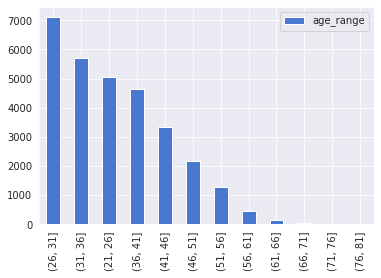

In [141]:
## Age group count
plt.figure(figsize = (10,8))
pd.DataFrame(new_df['age_range'].value_counts()).plot(kind="bar")

* which age group of female having maximum default payments?

In [98]:
## creating dataframe for Male Defaulters' 
female_df = new_df[['age_range','gender','default']][new_df['gender'] == 2]
female_df

,age_range,gender,default
0,"(21, 26]",2,1
1,"(21, 26]",2,1
2,"(31, 36]",2,0
3,"(36, 41]",2,0
7,"(21, 26]",2,0
...,...,...,...
29180,"(56, 61]",2,1
29181,"(56, 61]",2,0
29182,"(51, 56]",2,0
29185,"(51, 56]",2,0


In [99]:
# group the data by age range
grouped = female_df.groupby('age_range')

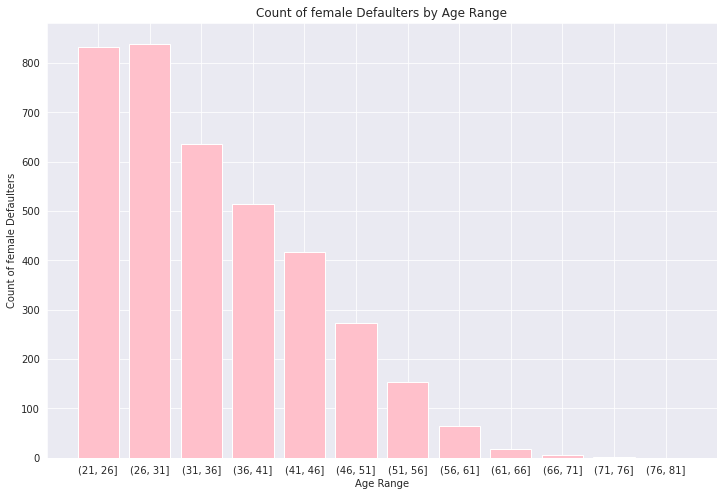

In [103]:
# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts, color = "pink")
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of female Defaulters')
plt.title('Count of female Defaulters by Age Range')
plt.show()

### What all manipulations have you done and insights you found?

* We rename the data set so that it become readable.
* Total Males percentage: 39.63%
* Total Female percentage: 60.37%
* Percentage of of male defaulters: 43.29415310427969 %
* Percentage of of female defaulters: 56.70584689572031 %

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

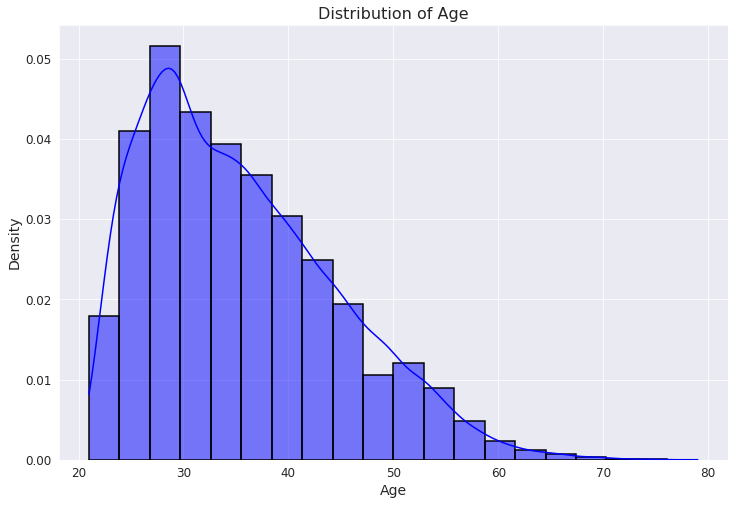

In [40]:
# Chart - 1 visualization codeplt
# Set style and color palette
sns.set_style('darkgrid')
sns.set_palette('muted')

# Create figure and axes
fig, ax = plt.subplots(figsize=(12, 8))

# Plot histogram with KDE
sns.histplot(data=df, x='age', kde=True,
             color='blue', edgecolor='black', linewidth=1.5,
             stat='density', fill=True, alpha=0.5, cumulative=False,
             bins=20, binwidth=None, binrange=None, discrete=False,
             shrink=1, multiple='layer', element='bars',
             hue=None, hue_order=None, hue_norm=None)

# Set labels and title
ax.set_xlabel('Age', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.set_title('Distribution of Age', fontsize=16)

# Set tick parameters
ax.tick_params(axis='both', labelsize=12)

# Show plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

* We can clearly see that the Data is right skewed.

#### Chart - 2

<Axes: xlabel='education', ylabel='count'>

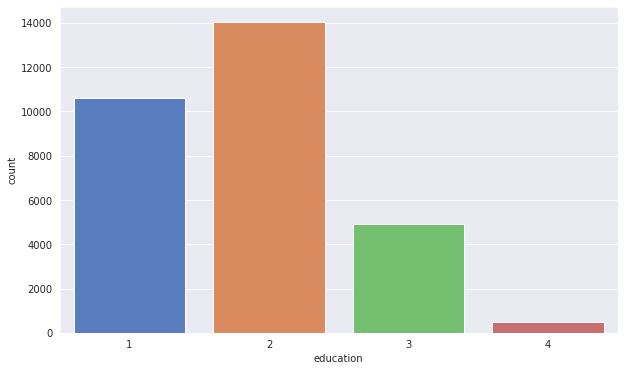

In [86]:
# Chart - 2 visualization code
plt.figure(figsize = (10,6))
sns.countplot(x='education', data=df)


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

<Axes: xlabel='education'>

<Figure size 720x432 with 0 Axes>

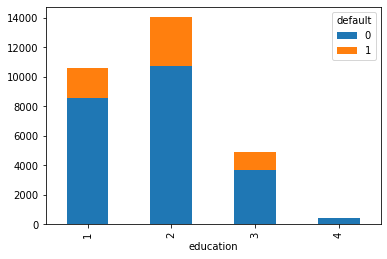

In [30]:
# Chart - 3 visualization code
plt.figure(figsize = (10,6))
pd.crosstab(df['education'], df['default']).plot(kind='bar', stacked=True)



##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

<Axes: xlabel='max_credit_given', ylabel='age'>

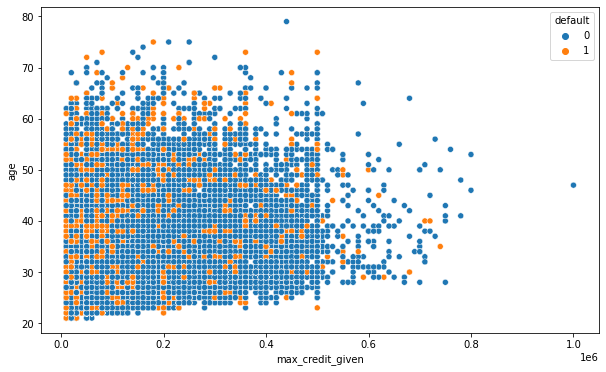

In [31]:
# Chart - 4 visualization code
plt.figure(figsize = (10,6))
sns.scatterplot(x='max_credit_given', y='age', hue='default', data=df)

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

<Axes: xlabel='default', ylabel='count'>

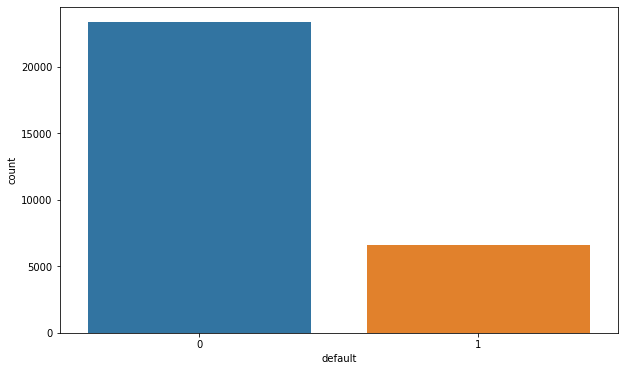

In [32]:
# Chart - 5 visualization code
plt.figure(figsize = (10,6))
sns.countplot(x='default', data=df)

Defaulters Percentage from total customers.

In [33]:
## Default Percentage 
Default_count = df["default"][df["default"] == 1].value_counts()
Default_count

1    6636
Name: default, dtype: int64

In [34]:
## Default percentage
default_percentage = (Default_count / df.shape[0]) * 100

print("Defaul_percentage % :", default_percentage)

Defaul_percentage % : 1    22.12
Name: default, dtype: float64


##### 1. Why did you pick the specific chart?

* From Barchart representation we can clearly see the deference between the value counts.


Answer Here.

##### 2. What is/are the insight(s) found from the chart?

* Here we can see the inbalance in the data

* 22.12% defaulters in total customers.

* 

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

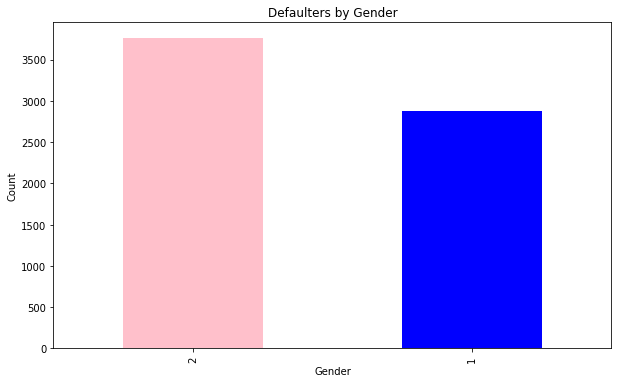

In [35]:
# Chart - 6 visualization code

# Get the value counts of male and female defaulters
male_female_defaulters = df['gender'][df['default'] == 1].value_counts()

# Plot the bar chart with custom colors
plt.figure(figsize = (10,6))
colors = ['pink','blue']
male_female_defaulters.plot(kind='bar', color=colors)

# Set the title and labels
plt.title('Defaulters by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the plot
plt.show()

bar chart with blue bars for male defaulters and pink bars for female defaulters.

##### 1. Why did you pick the specific chart?

We Use Bar Chart to easily distinguish between male and female.

##### 2. What is/are the insight(s) found from the chart?

As we can clearly se that the female deafulter count is higher than male defaulters

Befor making any type of conclusions we need to dig deeper to find the reasion why female count is higher?

# Male female count percentage in total customers count.
* Male percentage: 39.63%

* Female percentage: 60.37%

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

which Age group uses Credit card the most??

In [33]:
# Chart - 7 visualization code

<Axes: >

<Figure size 720x576 with 0 Axes>

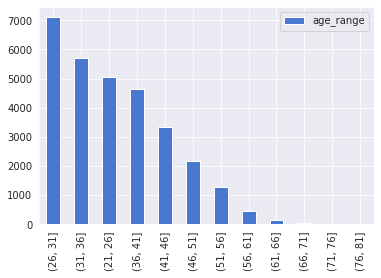

In [ ]:
## Age group count
plt.figure(figsize = (10,8))
pd.DataFrame(new_df['age_range'].value_counts()).plot(kind="bar")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

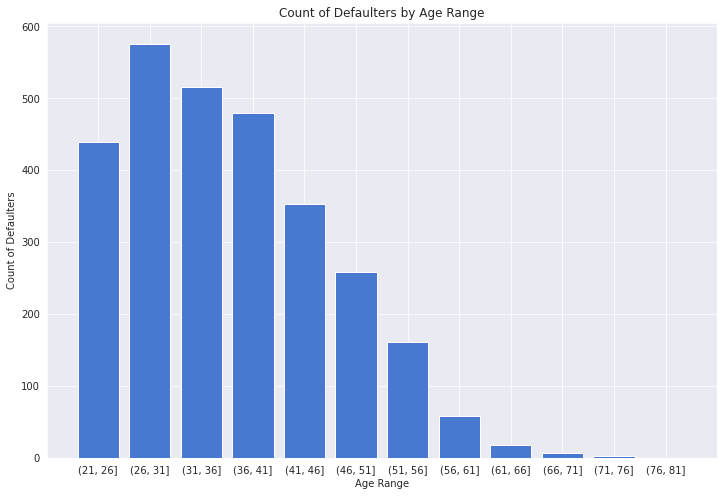

In [142]:
# Chart - 8 visualization code
# create a bar chart of defaulters by age range
counts = grouped['default'].sum()
plt.figure(figsize = (12,8))
plt.bar(range(len(counts)), counts)
plt.xticks(range(len(counts)), [str(x) for x in counts.index])
plt.xlabel('Age Range')
plt.ylabel('Count of Defaulters')
plt.title('Count of Defaulters by Age Range')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [35]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [36]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [37]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [38]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [39]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

<Axes: >

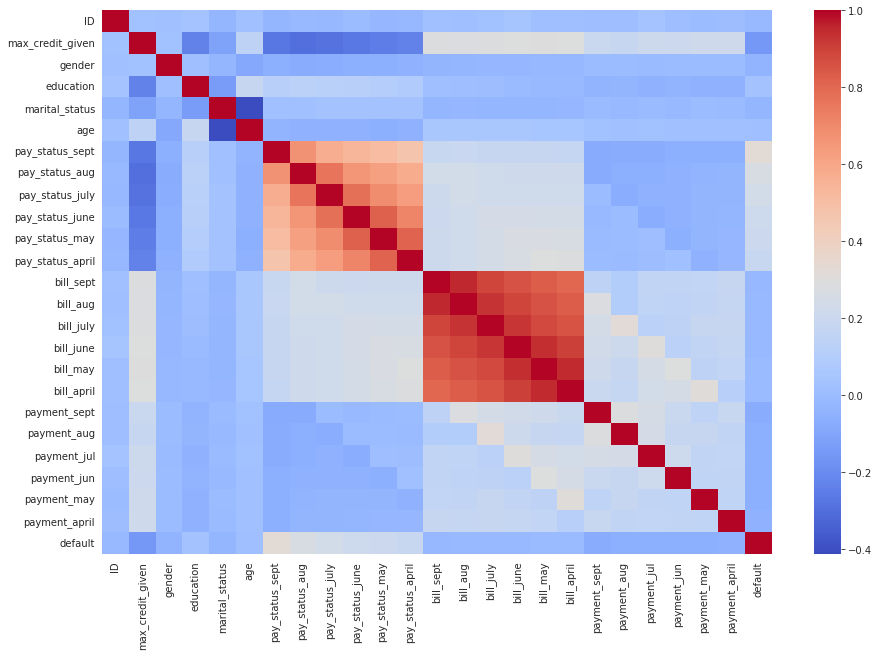

In [149]:
# Correlation Heatmap visualization code
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr, annot=False, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

Define the null and alternative hypothesis:
* Null hypothesis: There is no significant difference between the default rates of males and females.

* Alternative hypothesis: There is a significant difference between the default rates of males and females.


#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [151]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['gender'], df['default'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

In [153]:
p_value
chi2

47.70879689062111

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [43]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [44]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [45]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [46]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [47]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [48]:
# Expand Contraction

#### 2. Lower Casing

In [49]:
# Lower Casing

#### 3. Removing Punctuations

In [50]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [51]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [52]:
# Remove Stopwords

In [53]:
# Remove White spaces

#### 6. Rephrase Text

In [54]:
# Rephrase Text

#### 7. Tokenization

In [55]:
# Tokenization

#### 8. Text Normalization

In [56]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [57]:
# POS Taging

#### 10. Text Vectorization

In [58]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [59]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [60]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [61]:
# Transform Your data

### 6. Data Scaling

In [62]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [63]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [64]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [65]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [66]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [69]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [70]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [71]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [72]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [73]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [74]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [75]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***